In [ ]:
!pip install requests beautifulsoup4 pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website
url = 'https://optimizeyourbiology.com/light-bulb-database'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table
table = soup.find('table')

# Extract table headers
headers = [header.text for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr'):
    rows.append([cell.text for cell in row.find_all('td')])

# Create a pandas DataFrame
df = pd.DataFrame(rows[1:], columns=headers)


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website
url = 'https://optimizeyourbiology.com/light-bulb-database'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table
table = soup.find('table')

# Extract table headers
headers = [header.text for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    # Extract links from the "Test Data" column
    links = [cell.a['href'] if cell.a else cell.text for cell in cells]
    rows.append(links)

# Create a pandas DataFrame
df = pd.DataFrame(rows[1:], columns=headers)

df


,Integrating Sphere Tested,Brand,Model,Link,CCT (hidden),CCT,CCT (After 1 hour),Lumens,Watts,Base,...,Flicker Depth,CRI,Rf,Rg,ASD,Finish,Spectrum,Test Date,Test Data,Coupon Code
0,,GE,Sun Filled,https://amzn.to/3wUly7d,2700K,2700K,2800K,850,10.5W,E26,...,17.7%,96.1,95,102,13.2%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,2/4/2023,https://drive.google.com/drive/folders/1e5qPBl...,
1,,GE,Sun Filled,https://amzn.to/3nVGUQf,5000K,5000K,5150K,850,10.5W,E26,...,13.6%,97.7,98,101,8.4%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,2/4/2023,https://drive.google.com/drive/folders/1vC_HTO...,
2,,Norb,Smile,https://amzn.to/3Y4V2nD,5000K,5000K,5250K,800,11W,E26,...,28.6%,97.3,98,100,8.2%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,2/3/2023,https://drive.google.com/drive/folders/1w89xSp...,
3,,Norb,Smile Soft,https://amzn.to/3X7pzjl,4000K,4000K,4250K,800,11W,E26,...,28.1%,98,97,100,9.7%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,2/2/2023,https://drive.google.com/drive/folders/1W1wNlU...,
4,,Norb,Everyday-Sun,https://amzn.to/3JHFRMP,5000K,5000K,4900K,800,9W,E26,...,20.7%,89.9,91,97,12.7%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,2/2/2023,https://drive.google.com/drive/folders/1VK6_2Q...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,,Yuji,CRI-MAX,https://store.yujiintl.com/collections/yuji-cr...,5600K,5600K,5750K,1100,11W,E26,...,1%,92.5,87,95,18.4%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,Jun/17/2023,https://drive.google.com/drive/folders/1BnZJaQ...,OYBYJ5 for 5% off
99,,Yuji,SunWave,https://store.yujiintl.com/collections/sunwave...,3000K,3000K,3050K,1100,11W,E26,...,1.2%,97.7,96,101,11.9%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,Jun/17/2023,https://drive.google.com/drive/folders/1zx7IBg...,OYBYJ5 for 5% off
100,,Yuji,SunWave,https://store.yujiintl.com/collections/sunwave...,4000K,4000K,4100K,1100,11W,E26,...,1%,96.9,93,98,9.5%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,Jun/17/2023,https://drive.google.com/drive/folders/1bViONo...,OYBYJ5 for 5% off
101,,Yuji,SunWave,https://store.yujiintl.com/collections/sunwave...,6500K,6500K,6600K,1100,11W,E26,...,1%,95.3,92,97,8.7%,Plastic,https://optimizeyourbiology.com/wp-content/upl...,Jun/17/2023,https://drive.google.com/drive/folders/1BuxfQs...,OYBYJ5 for 5% off


In [ ]:

# Drop the specified columns
columns_to_drop = ['Integrating Sphere Tested', 'Link', 'Waveform', 'Flicker Graph', 'Coupon Code']
df.drop(columns=columns_to_drop, inplace=True)



In [ ]:
df.head()
df.columns

Index(['Brand', 'Model', 'CCT (hidden)', 'CCT', 'CCT (After 1 hour)', 'Lumens',
       'Watts', 'Base', 'Shape', 'Dimmable', 'Flicker Risk', 'Flicker Index',
       'Flicker Depth', 'CRI', 'Rf', 'Rg', 'ASD', 'Finish', 'Spectrum',
       'Test Date', 'Test Data'],
      dtype='object')

In [ ]:
df.drop(columns=['Spectrum'], inplace=True)


In [ ]:
df.head()

,Brand,Model,CCT (hidden),CCT,CCT (After 1 hour),Lumens,Watts,Base,Shape,Dimmable,Flicker Risk,Flicker Index,Flicker Depth,CRI,Rf,Rg,ASD,Finish,Test Date,Test Data
0,GE,Sun Filled,2700K,2700K,2800K,850,10.5W,E26,A21,Yes,High Risk,0.0515,17.7%,96.1,95,102,13.2%,Plastic,2/4/2023,https://drive.google.com/drive/folders/1e5qPBl...
1,GE,Sun Filled,5000K,5000K,5150K,850,10.5W,E26,A21,Yes,High Risk,0.0402,13.6%,97.7,98,101,8.4%,Plastic,2/4/2023,https://drive.google.com/drive/folders/1vC_HTO...
2,Norb,Smile,5000K,5000K,5250K,800,11W,E26,A19,Yes,High Risk,0.0865,28.6%,97.3,98,100,8.2%,Plastic,2/3/2023,https://drive.google.com/drive/folders/1w89xSp...
3,Norb,Smile Soft,4000K,4000K,4250K,800,11W,E26,A19,Yes,High Risk,0.0890,28.1%,98,97,100,9.7%,Plastic,2/2/2023,https://drive.google.com/drive/folders/1W1wNlU...
4,Norb,Everyday-Sun,5000K,5000K,4900K,800,9W,E26,A19,Yes,High Risk,0.0545,20.7%,89.9,91,97,12.7%,Plastic,2/2/2023,https://drive.google.com/drive/folders/1VK6_2Q...


In [ ]:
import pandas as pd

# Function to classify bulb type and estimate lifespan
def classify_bulb(row):
    wattage = float(row['Watts'][:-1]) if row['Watts'].endswith('W') else 0
    lifespan = (0, 0)

    if 6 <= wattage <= 15 and row['Base'] in ['E26', 'E27', 'GU24']:
        bulb_type = 'CFL'
        lifespan = (6000, 15000)
    elif 20 <= wattage <= 100 and row['Base'] in ['E26', 'E27', 'GU10']:
        bulb_type = 'Halogen'
        lifespan = (2000, 4000)
    elif wattage <= 150 and row['Base'] in ['E26', 'E27']:
        bulb_type = 'Incandescent'
        lifespan = (1000, 2000)
    elif 4 <= wattage <= 20 and row['Base'] in ['E26', 'E27', 'GU10']:
        bulb_type = 'LED'
        lifespan = (25000, 50000)
    else:
        bulb_type = 'Unknown'

    return pd.Series([bulb_type, lifespan], index=['Bulb_Type', 'Lifespan_Range'])

# Apply the function to classify bulb type and estimate lifespan
df[['Bulb_Type', 'Lifespan_Range']] = df.apply(classify_bulb, axis=1)

# Display the updated DataFrame
df.head()


,Brand,Model,CCT (hidden),CCT,CCT (After 1 hour),Lumens,Watts,Base,Shape,Dimmable,...,Flicker Depth,CRI,Rf,Rg,ASD,Finish,Test Date,Test Data,Bulb_Type,Lifespan_Range
0,GE,Sun Filled,2700K,2700K,2800K,850,10.5W,E26,A21,Yes,...,17.7%,96.1,95,102,13.2%,Plastic,2/4/2023,https://drive.google.com/drive/folders/1e5qPBl...,CFL,"(6000, 15000)"
1,GE,Sun Filled,5000K,5000K,5150K,850,10.5W,E26,A21,Yes,...,13.6%,97.7,98,101,8.4%,Plastic,2/4/2023,https://drive.google.com/drive/folders/1vC_HTO...,CFL,"(6000, 15000)"
2,Norb,Smile,5000K,5000K,5250K,800,11W,E26,A19,Yes,...,28.6%,97.3,98,100,8.2%,Plastic,2/3/2023,https://drive.google.com/drive/folders/1w89xSp...,CFL,"(6000, 15000)"
3,Norb,Smile Soft,4000K,4000K,4250K,800,11W,E26,A19,Yes,...,28.1%,98,97,100,9.7%,Plastic,2/2/2023,https://drive.google.com/drive/folders/1W1wNlU...,CFL,"(6000, 15000)"
4,Norb,Everyday-Sun,5000K,5000K,4900K,800,9W,E26,A19,Yes,...,20.7%,89.9,91,97,12.7%,Plastic,2/2/2023,https://drive.google.com/drive/folders/1VK6_2Q...,CFL,"(6000, 15000)"


In [ ]:
df=df.drop(columns=['Test Date', 'Test Data'])

In [ ]:
df.dtypes


Brand                 object
Model                 object
CCT (hidden)          object
CCT                   object
CCT (After 1 hour)    object
Lumens                object
Watts                 object
Base                  object
Shape                 object
Dimmable              object
Flicker Risk          object
Flicker Index         object
Flicker Depth         object
CRI                   object
Rf                    object
Rg                    object
ASD                   object
Finish                object
Bulb_Type             object
Lifespan_Range        object
dtype: object

In [ ]:
df.head()

,Brand,Model,CCT (hidden),CCT,CCT (After 1 hour),Lumens,Watts,Base,Shape,Dimmable,Flicker Risk,Flicker Index,Flicker Depth,CRI,Rf,Rg,ASD,Finish,Bulb_Type,Lifespan_Range
0,GE,Sun Filled,2700K,2700K,2800K,850,10.5W,E26,A21,Yes,High Risk,0.0515,17.7%,96.1,95,102,13.2%,Plastic,CFL,"(6000, 15000)"
1,GE,Sun Filled,5000K,5000K,5150K,850,10.5W,E26,A21,Yes,High Risk,0.0402,13.6%,97.7,98,101,8.4%,Plastic,CFL,"(6000, 15000)"
2,Norb,Smile,5000K,5000K,5250K,800,11W,E26,A19,Yes,High Risk,0.0865,28.6%,97.3,98,100,8.2%,Plastic,CFL,"(6000, 15000)"
3,Norb,Smile Soft,4000K,4000K,4250K,800,11W,E26,A19,Yes,High Risk,0.0890,28.1%,98,97,100,9.7%,Plastic,CFL,"(6000, 15000)"
4,Norb,Everyday-Sun,5000K,5000K,4900K,800,9W,E26,A19,Yes,High Risk,0.0545,20.7%,89.9,91,97,12.7%,Plastic,CFL,"(6000, 15000)"


In [ ]:
# Convert 'Lumens' column to strings and remove rows with non-numeric values
df = df[df['Lumens'].astype(str).apply(lambda x: x.isnumeric())]

# Strip non-numeric characters from 'Watts' column and convert to float
df['Watts'] = df['Watts'].str.replace('W', '').astype(float)

# Convert other columns to appropriate data types
df['Lumens'] = df['Lumens'].astype(int)


<ipython-input-12-6d76cabd33cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Watts'] = df['Watts'].str.replace('W', '').astype(float)
<ipython-input-12-6d76cabd33cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lumens'] = df['Lumens'].astype(int)


In [ ]:
df['Flicker Index'] = df['Flicker Index'].str.replace('%', '').astype(float)



In [ ]:
# Convert 'CRI' to float, replacing 'N/A' with NaN
df['CRI'] = pd.to_numeric(df['CRI'], errors='coerce')

# Fill missing 'CRI' values with the median of respective 'Brand' and 'Model' groups
df['CRI'] = df.groupby(['Brand', 'Model'])['CRI'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
# Convert 'Rf' and 'Rg' to float, replacing 'N/A' with NaN
df['Rf'] = pd.to_numeric(df['Rf'], errors='coerce')
df['Rg'] = pd.to_numeric(df['Rg'], errors='coerce')

# Fill missing 'Rf' and 'Rg' values with the median of respective 'Brand' and 'Model' groups
df['Rf'] = df.groupby(['Brand', 'Model'])['Rf'].transform(lambda x: x.fillna(x.median()))
df['Rg'] = df.groupby(['Brand', 'Model'])['Rg'].transform(lambda x: x.fillna(x.median()))



/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [52]:
import numpy as np
df['ASD'] = df['ASD'].replace('N/A', np.nan)
#df['ASD'] = df['ASD'].str.replace('%', '').astype(float)
df['ASD'] = df.groupby(['Brand', 'Model'])['ASD'].transform(lambda x: x.fillna(x.mean()))
for column in columns_with_nan:
    df[column] = df[column].fillna(df.groupby(['Brand', 'Model'])[column].transform('mean'))
df.dropna(inplace=True)
# Verify the number of rows after dropping NaN values
print("Number of rows after dropping NaN values:", len(df))

Number of rows after dropping NaN values: 88


In [53]:
# Remove 'K' from 'CCT' values
#df['CCT'] = df['CCT'].str.rstrip('K')
#df['CCT (After 1 hour)'] = df['CCT (After 1 hour)'].str.rstrip('K')
# Convert 'CCT' to numeric
df['CCT'] = pd.to_numeric(df['CCT'], errors='coerce')
df['CCT (After 1 hour)'] = pd.to_numeric(df['CCT'], errors='coerce')
#df=df.drop(columns=['CCT (hidden)'])
df.head()

,Brand,Model,CCT,CCT (After 1 hour),Lumens,Watts,Base,Shape,Dimmable,Flicker Risk,Flicker Index,Flicker Depth,CRI,Rf,Rg,ASD,Finish,Bulb_Type,Lifespan_Range
0,2,29,2700.0,2700.0,850,10.5,1,2,1,High Risk,0.0515,17.7,96.1,95.0,102.0,13.2,6,0,3
1,2,29,5000.0,5000.0,850,10.5,1,2,1,High Risk,0.0402,13.6,97.7,98.0,101.0,8.4,6,0,3
2,9,27,5000.0,5000.0,800,11.0,1,1,1,High Risk,0.0865,28.6,97.3,98.0,100.0,8.2,6,0,3
3,9,28,4000.0,4000.0,800,11.0,1,1,1,High Risk,0.0890,28.1,98.0,97.0,100.0,9.7,6,0,3
4,9,10,5000.0,5000.0,800,9.0,1,1,1,High Risk,0.0545,20.7,89.9,91.0,97.0,12.7,6,0,3


Accuracy: 88.89%
              precision    recall  f1-score   support

   High Risk       0.86      0.86      0.86         7
    Low Risk       1.00      0.67      0.80         3
     No Risk       0.89      1.00      0.94         8

    accuracy                           0.89        18
   macro avg       0.92      0.84      0.87        18
weighted avg       0.90      0.89      0.88        18



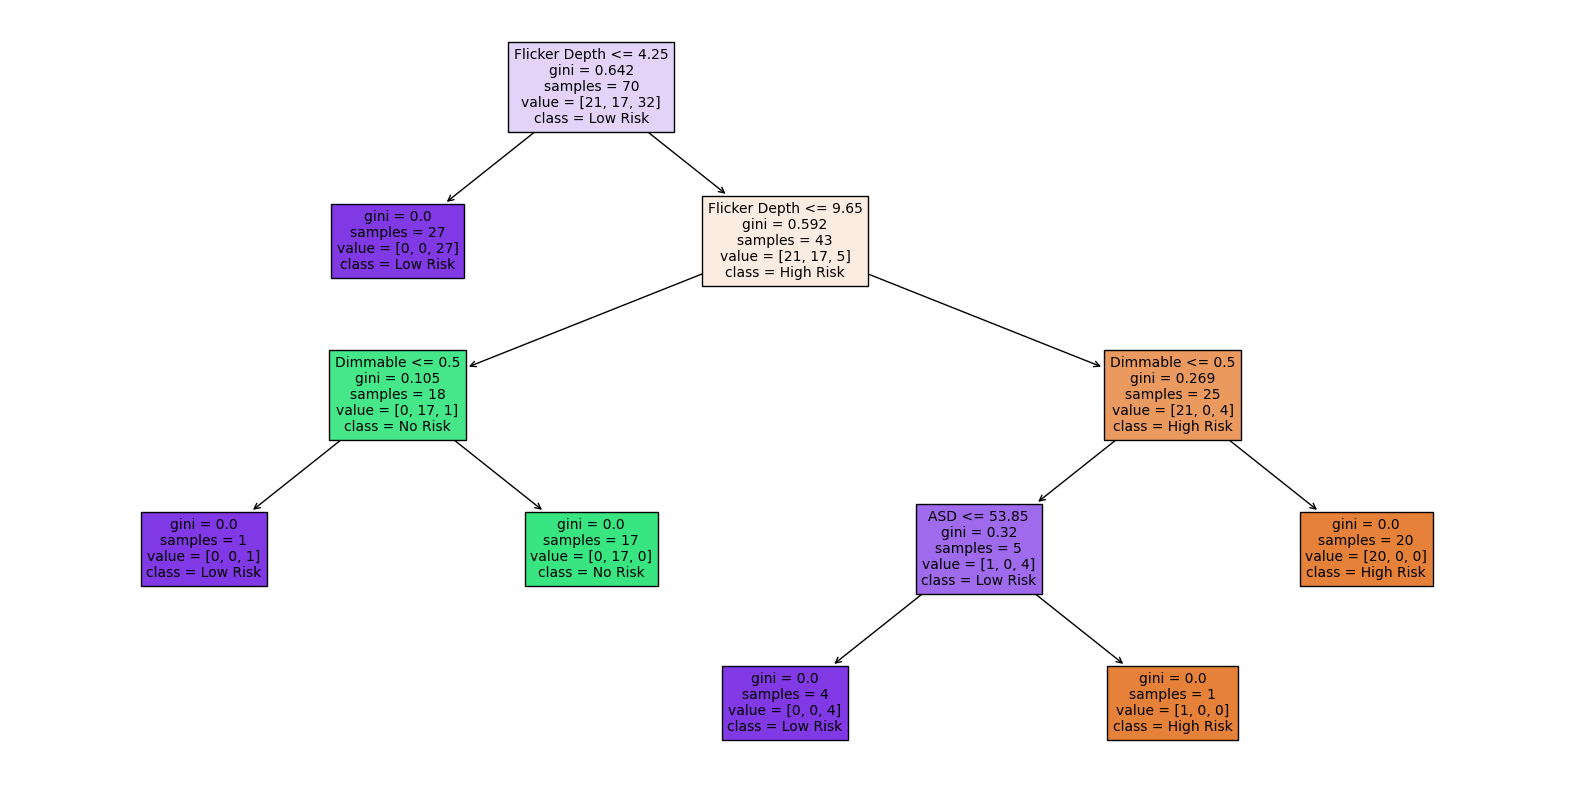

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Define categorical columns for label encoding
categorical_cols = ['Brand', 'Model', 'Base', 'Shape', 'Dimmable', 'Finish', 'Bulb_Type', 'Lifespan_Range']

# Initialize label encoders
label_encoders = {}

# Encode categorical variables
for col in categorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Split data into features and target variable
X = df.drop('Flicker Risk', axis=1)
y = df['Flicker Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=df['Flicker Risk'].unique(), filled=True, fontsize=10)
plt.show()
